# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>

## Exercise 09

The aim of this exercise is to write a **genetic algorithm** to solve the **Travelling Salesman problem** (**TSP**).

*How to run the C++ code:*

1. `Circ.sh`*
2. `Square.sh`*

*Before running the code, please empty the directory from the previous data, running `clean.sh`.*

The TSP consists in finding the **shortest path** connecting $N$ cities, so that every city is visited only once except for one city, in which the journey must start and end.

Genetic algorithms are algorithms inspired by the teories of the **evolution of the species**: in fact they make use of the words population, genes, chromosomes, mutation, evolution, generation...

In this case the population is made up of 100 different trips (the chromosomes) and the cities represent the genes. The evolution of the population is determined by **selection**, **crossover** and **mutation**.
Selection means advantaging the individuals with the best characteristics (in this case, the shortest trips are advantaged), crossover means to recombinate the genes of two parents (keeping some of their characteristics) to generate two new individuals, while mutation means to randomly change the genoma of an individual.

#### Description of the code

To describe the population, the trips and the cities I created three omonimous **classes** (Population, Trip and City).
The class **City** is characterised by the coordinates of the city (x and y), a progressive integer to label the city and a bool used to check which one is the first city (to lower degeneration to two, in fact, during the evolution process the first city remains always the same).
The class **Trip** contains a vector of cities in a specific order and a double to record the length of the trip, as well as some methods in which the mutations are implemented.
The class **population** is made up by a vector of trips (actually, it contains another vector of trips, called Deliveryroom, which is where the crossover happens), an integer to take track of the generation and two other data members to record the best generation so far and the best trip so far. It also contains the methods to perform selection, crossover and mutations, and to create a new generation after that.

#### Evolution process

These are the steps followed to create a new generation:

1. Sorting the population from the shortest trip to the longest
2. **Selection** of 50 couples to crossover: to favour the fittest individuals (the first ones in a sorted population) the individual $j$ is selected through the formula $j=int (N\times r^p)$ where $r$ is a uniform random number $r\in[0,1)$ and $p$ an exponent which I decided to set to 5. 
3. **Crossover** of the selected couples, with probability $p_c$. The crossover is implemented in this way: the first half of the cities in one of the parents remains the same, while the other half is obtained reorganising the remaining cities in the order in which they appear in the second parent. This happens for both of the parents, generating two new individuals from every couple.
4. **Mutation** of the new individuals. I implemented five different mutations, all with the same probability $p_m$:
    - swapping two randomly chosen cities
    - swapping two contiguous cities
    - swapping $m$ contiguous cities with other $m$ contiguous cities
    - shifting forward $m$ contiguous cities of $n$ positions
    - inverting of the order in which appear in the path $m$ cities
    
5. Creating a new generation of individuals keeping the best 1/4 of the old individuals and replacing the others with the best 3/4 of the new individuals

## Cities on a circumference

First, the algorithm had to be implemented with 32 cities randomly placed on a circumference (i decided to set $r=1$ as the radius of the circumference). This is a good configuration to start with because it is particularly simple to visually check if the best past has been found. It is trivial, indeed, that the shortest path is the one which follows the circumference.

#### Calibration

I made different runs of the code with different values of $p_c$ and $p_m$ to find the best values to use in my simulation.
Typically $p_c > 50\%$ so I tried the values $p_c = 50\%$, $p_c = 70\%$ and $p_c = 90\%$, and usually $p_m < 10\%$, so I tried the values $p_m = 5\%$, $p_m = 7\%$ and $p_m = 9\%$. Below my results are reported.



In [30]:
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt

OSError: Circ_Evolution_0.900000_0.070000.out not found.

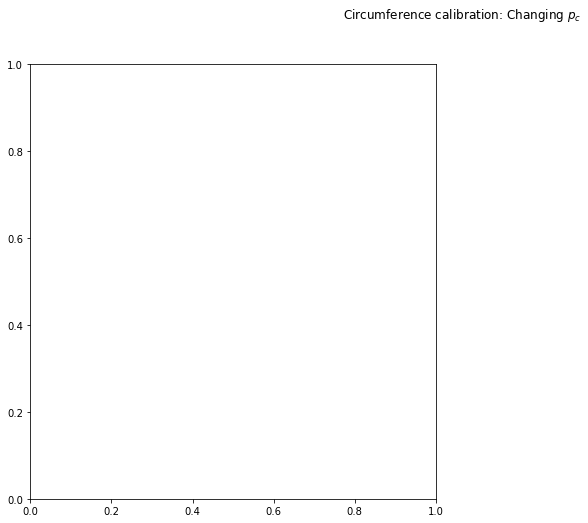

In [31]:
fig = plt.figure (figsize = (16, 8))
plt.suptitle ("Circumference calibration: Changing $p_c$")

plt.subplot (1, 2, 1)
n1, l1 = np.loadtxt ("Circ_Evolution_0.500000_0.070000.out", usecols=(0,1), unpack=True)
n2, l2 = np.loadtxt ("Circ_Evolution_0.700000_0.070000.out", usecols=(0,1), unpack=True)
n3, l3 = np.loadtxt ("Circ_Evolution_0.900000_0.070000.out", usecols=(0,1), unpack=True)

plt.plot(n1, l1, label = "$p_c = 0.5$") #marker='o',
plt.plot(n2, l2, label = "$p_c = 0.7$") #marker='o',
plt.plot(n3, l3, label = "$p_c = 0.9$") #marker='o',

plt.title("Evolution of the best trip length")
plt.xlabel("N")
plt.ylabel("length")
plt.grid(True)
plt.legend()

plt.subplot (1, 2, 2)
n1, l1 = np.loadtxt ("Circ_Ave_0.500000_0.070000.out", usecols=(0, 1), unpack=True)
n2, l2 = np.loadtxt ("Circ_Ave_0.700000_0.070000.out", usecols=(0,1), unpack=True)
n3, l3 = np.loadtxt ("Circ_Ave_0.900000_0.070000.out", usecols=(0,1), unpack=True)

plt.plot(n1, l1, label = "$p_c = 0.5$") #marker='o',
plt.plot(n2, l2, label = "$p_c = 0.7$") #marker='o',
plt.plot(n3, l3, label = "$p_c = 0.9$") #marker='o',

plt.title("Evolution of the best half average length")
plt.xlabel("N")
plt.ylabel("length")
plt.grid(True)
plt.legend()

plt.show()


OSError: Circ_Evolution_0.700000_0.090000.out not found.

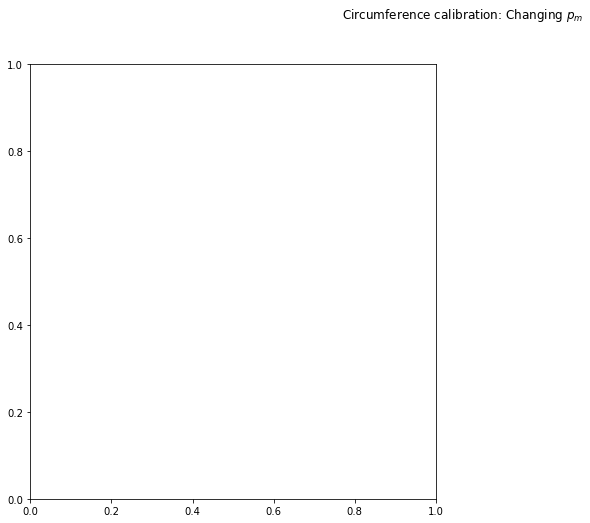

In [32]:
fig = plt.figure (figsize = (16, 8))
plt.suptitle ("Circumference calibration: Changing $p_m$")

plt.subplot (1, 2, 1)
n1, l1 = np.loadtxt ("Circ_Evolution_0.700000_0.050000.out", usecols=(0,1), unpack=True)
n2, l2 = np.loadtxt ("Circ_Evolution_0.700000_0.070000.out", usecols=(0,1), unpack=True)
n3, l3 = np.loadtxt ("Circ_Evolution_0.700000_0.090000.out", usecols=(0,1), unpack=True)

plt.plot(n1, l1, label = "$p_m = 0.5$") #marker='o',
plt.plot(n2, l2, label = "$p_m = 0.7$") #marker='o',
plt.plot(n3, l3, label = "$p_m = 0.9$") #marker='o',

plt.title("Evolution of the best trip length")
plt.xlabel("N")
plt.ylabel("length")
plt.grid(True)
plt.legend()

plt.subplot (1, 2, 2)
n1, l1 = np.loadtxt ("Circ_Ave_0.700000_0.050000.out", usecols=(0, 1), unpack=True)
n2, l2 = np.loadtxt ("Circ_Ave_0.700000_0.070000.out", usecols=(0,1), unpack=True)
n3, l3 = np.loadtxt ("Circ_Ave_0.700000_0.090000.out", usecols=(0,1), unpack=True)

plt.plot(n1, l1, label = "$p_m = 0.5$") #marker='o',
plt.plot(n2, l2, label = "$p_m = 0.7$") #marker='o',
plt.plot(n3, l3, label = "$p_m = 0.9$") #marker='o',

plt.title("Evolution of the best half average length")
plt.xlabel("N")
plt.ylabel("length")
plt.grid(True)
plt.legend()

plt.show()


According to the graphs above, I decided to keep $p_c = 70\%$ and $p_m = 7\%$. I also noticed that the results vary a lot changing the seed of the random numbers generator.

#### Results

Below I reported the first trip created, completely randomly, and the best trip found by the algorithm. I highlithed the first (and last) city in blue.
Then I reported the graphs showing the evolution of the best trip length and of the best half of the population average length. I also reported the final value of length of the best trip, and how many generations it took to find it. I noticed that also that this last value varies a lot depending on the seed given to the random numbers generator: it oscillates around 100 and 400 generations.

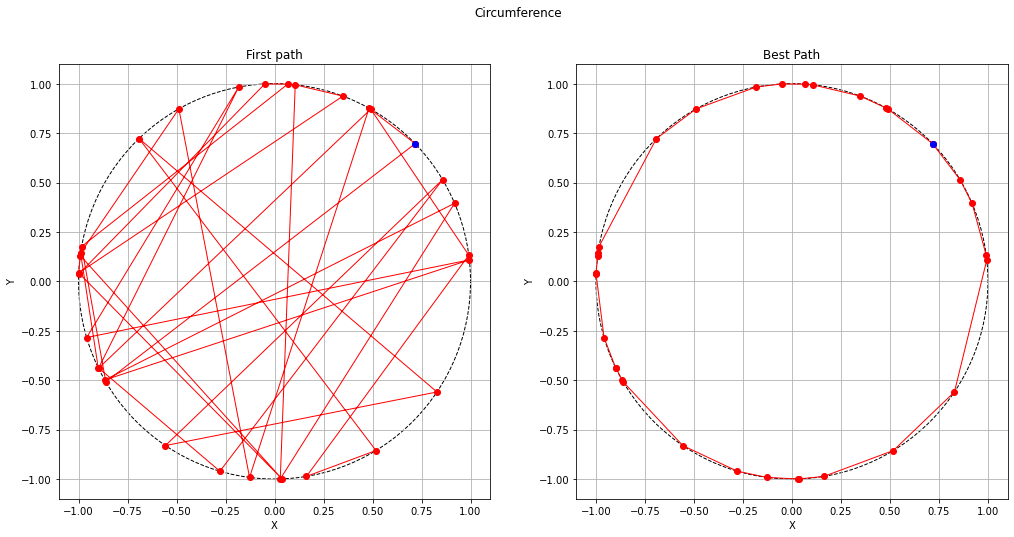

In [10]:
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt

fig = plt.figure (figsize = (17, 8))
plt.suptitle ("Circumference")

plt.subplot (1, 2, 1)
x, y = np.loadtxt ("Circ_FirstPath_0.700000_0.090000.out", usecols=(2, 3), unpack=True)

plt.plot(x, y, '-o', color="Red", linewidth=1)
plt.plot(x[0], y[0], '-o', color="Blue", linewidth=1)
plt.title("First path")
plt.xlabel("X")
plt.ylabel("Y")
plt.grid(True)
             
circle = plt.Circle((0, 0), 1, color="black", linestyle = "dashed", fill=False)
plt.gca().add_patch(circle)

plt.subplot (1, 2, 2)
x, y = np.loadtxt ("Circ_BestPath_0.700000_0.090000.out", usecols=(2, 3), unpack=True)

plt.plot(x, y, '-o', color="Red", linewidth=1)
plt.plot(x[0], y[0], '-o', color="Blue", linewidth=1)
plt.title("Best Path")
plt.xlabel("X")
plt.ylabel("Y")
plt.grid(True)
              
circle = plt.Circle((0, 0), 1, color="black", linestyle = "dashed", fill=False)     
plt.gca().add_patch(circle)

plt.show()

Final length:  6.2403
Found after  165  generations


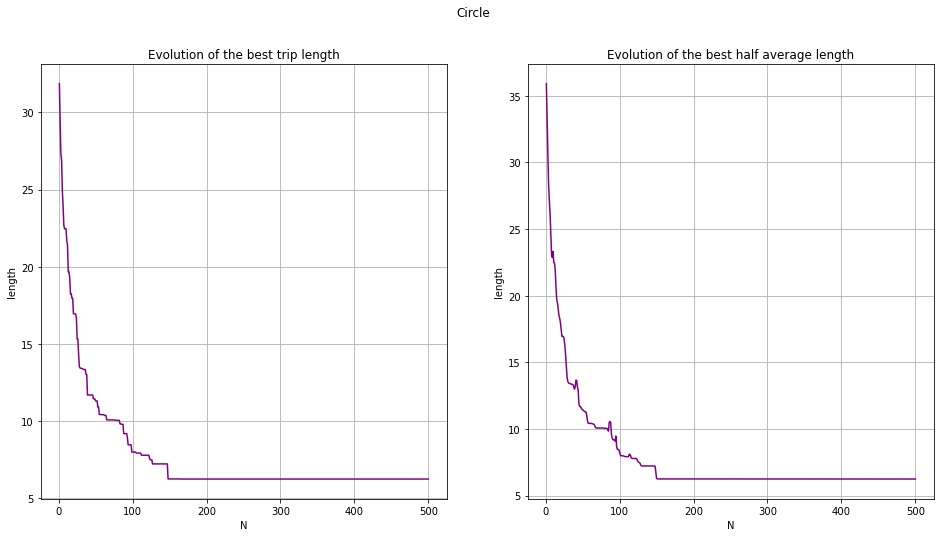

In [11]:
fig = plt.figure (figsize = (16, 8))
plt.suptitle ("Circle")

plt.subplot (1, 2, 1)
n, l, g = np.loadtxt ("Circ_Evolution_0.700000_0.090000.out", unpack=True)
last = len(l)
print ("Final length: ", l[last-1])
print ("Found after ", int(g[last-1]), " generations")

plt.plot(n, l, alpha=2, color="Purple") #marker='o',
plt.title("Evolution of the best trip length")
plt.xlabel("N")
plt.ylabel("length")
plt.grid(True)

plt.subplot (1, 2, 2)
n, l = np.loadtxt ("Circ_Ave_0.700000_0.090000.out", usecols=(0, 1), unpack=True)
#last = len(l)
#print ("Final length: ", l[last-1])

plt.plot(n, l, alpha=2, color="Purple") #marker='o',
plt.title("Evolution of the best half average length")
plt.xlabel("N")
plt.ylabel("length")
plt.grid(True)

plt.show()

## Cities on a square

The second task asked to implement the algorithm with 32 cities placed **inside a square** (i chose $l=1$ as the length of the side of the square).
Although is mtght seem very similar to the previos one, this second task is more difficult: as the graphs below show, the algorithm takes more generations to find the solution (so I run the code for 5000 generations instead of 500), and it's not even assured that the one found after 5000 generations is the true best path. In fact, due to the configuration of the cities, it is very easy to stop for a long time on a local minimun (but not the global one). And differently from the previous task, the solution cannot be verified visually.
For this reason I decided to try to make also a longer run (50000 generations), which I didn't include in this notebook, but the best trip remained the same.

#### Calibration

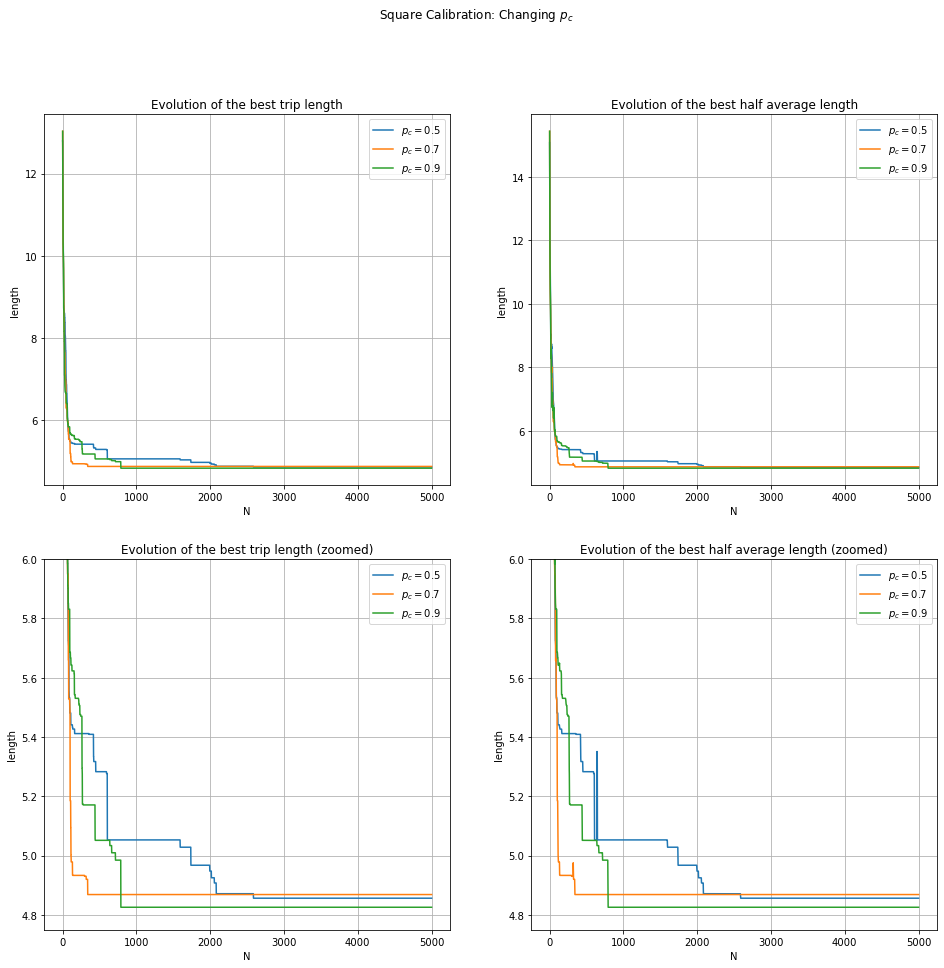

In [33]:
fig = plt.figure (figsize = (16, 15))
plt.suptitle ("Square Calibration: Changing $p_c$")

plt.subplot (2, 2, 1)
n1, l1 = np.loadtxt ("Square_Evolution_0.500000_0.070000.out", usecols=(0,1), unpack=True)
n2, l2 = np.loadtxt ("Square_Evolution_0.700000_0.070000.out", usecols=(0,1), unpack=True)
n3, l3 = np.loadtxt ("Square_Evolution_0.900000_0.070000.out", usecols=(0,1), unpack=True)

plt.plot(n1, l1, label = "$p_c = 0.5$") #marker='o',
plt.plot(n2, l2, label = "$p_c = 0.7$") #marker='o',
plt.plot(n3, l3, label = "$p_c = 0.9$") #marker='o',

plt.title("Evolution of the best trip length")
plt.xlabel("N")
plt.ylabel("length")
plt.grid(True)
plt.legend()

plt.subplot (2, 2, 3)
n1, l1 = np.loadtxt ("Square_Evolution_0.500000_0.070000.out", usecols=(0,1), unpack=True)
n2, l2 = np.loadtxt ("Square_Evolution_0.700000_0.070000.out", usecols=(0,1), unpack=True)
n3, l3 = np.loadtxt ("Square_Evolution_0.900000_0.070000.out", usecols=(0,1), unpack=True)

plt.plot(n1, l1, label = "$p_c = 0.5$") #marker='o',
plt.plot(n2, l2, label = "$p_c = 0.7$") #marker='o',
plt.plot(n3, l3, label = "$p_c = 0.9$") #marker='o',

plt.title("Evolution of the best trip length (zoomed)")
plt.xlabel("N")
plt.ylabel("length")
plt.grid(True)
plt.legend()
plt.ylim ([4.75, 6])

plt.subplot (2, 2, 2)
n1, l1 = np.loadtxt ("Square_Ave_0.500000_0.070000.out", usecols=(0, 1), unpack=True)
n2, l2 = np.loadtxt ("Square_Ave_0.700000_0.070000.out", usecols=(0,1), unpack=True)
n3, l3 = np.loadtxt ("Square_Ave_0.900000_0.070000.out", usecols=(0,1), unpack=True)

plt.plot(n1, l1, label = "$p_c = 0.5$") #marker='o',
plt.plot(n2, l2, label = "$p_c = 0.7$") #marker='o',
plt.plot(n3, l3, label = "$p_c = 0.9$") #marker='o',

plt.title("Evolution of the best half average length")
plt.xlabel("N")
plt.ylabel("length")
plt.grid(True)
plt.legend()

plt.subplot (2, 2, 4)
n1, l1 = np.loadtxt ("Square_Ave_0.500000_0.070000.out", usecols=(0, 1), unpack=True)
n2, l2 = np.loadtxt ("Square_Ave_0.700000_0.070000.out", usecols=(0,1), unpack=True)
n3, l3 = np.loadtxt ("Square_Ave_0.900000_0.070000.out", usecols=(0,1), unpack=True)

plt.plot(n1, l1, label = "$p_c = 0.5$") #marker='o',
plt.plot(n2, l2, label = "$p_c = 0.7$") #marker='o',
plt.plot(n3, l3, label = "$p_c = 0.9$") #marker='o',

plt.title("Evolution of the best half average length (zoomed)")
plt.xlabel("N")
plt.ylabel("length")
plt.grid(True)
plt.legend()
plt.ylim ([4.75, 6])

plt.show()


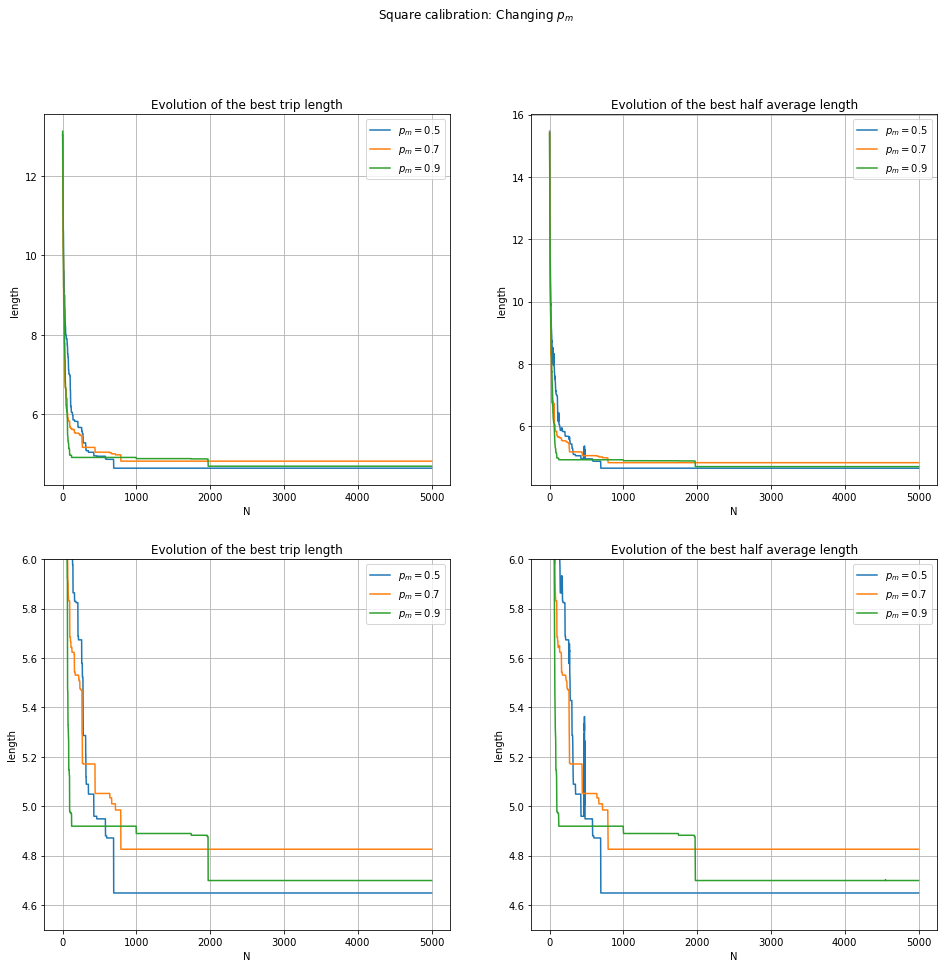

In [34]:
fig = plt.figure (figsize = (16, 15))
plt.suptitle ("Square calibration: Changing $p_m$")

plt.subplot (2, 2, 1)
n1, l1 = np.loadtxt ("Square_Evolution_0.900000_0.050000.out", usecols=(0,1), unpack=True)
n2, l2 = np.loadtxt ("Square_Evolution_0.900000_0.070000.out", usecols=(0,1), unpack=True)
n3, l3 = np.loadtxt ("Square_Evolution_0.900000_0.090000.out", usecols=(0,1), unpack=True)

plt.plot(n1, l1, label = "$p_m = 0.5$") #marker='o',
plt.plot(n2, l2, label = "$p_m = 0.7$") #marker='o',
plt.plot(n3, l3, label = "$p_m = 0.9$") #marker='o',

plt.title("Evolution of the best trip length")
plt.xlabel("N")
plt.ylabel("length")
plt.grid(True)
plt.legend()

plt.subplot (2, 2, 3)
plt.plot(n1, l1, label = "$p_m = 0.5$") #marker='o',
plt.plot(n2, l2, label = "$p_m = 0.7$") #marker='o',
plt.plot(n3, l3, label = "$p_m = 0.9$") #marker='o',

plt.title("Evolution of the best trip length")
plt.xlabel("N")
plt.ylabel("length")
plt.grid(True)
plt.legend()
plt.ylim ([4.5, 6])

plt.subplot (2, 2, 2)
n1, l1 = np.loadtxt ("Square_Ave_0.900000_0.050000.out", usecols=(0, 1), unpack=True)
n2, l2 = np.loadtxt ("Square_Ave_0.900000_0.070000.out", usecols=(0,1), unpack=True)
n3, l3 = np.loadtxt ("Square_Ave_0.900000_0.090000.out", usecols=(0,1), unpack=True)

plt.plot(n1, l1, label = "$p_m = 0.5$") #marker='o',
plt.plot(n2, l2, label = "$p_m = 0.7$") #marker='o',
plt.plot(n3, l3, label = "$p_m = 0.9$") #marker='o',

plt.title("Evolution of the best half average length")
plt.xlabel("N")
plt.ylabel("length")
plt.grid(True)
plt.legend()

plt.subplot (2, 2, 4)
plt.plot(n1, l1, label = "$p_m = 0.5$") #marker='o',
plt.plot(n2, l2, label = "$p_m = 0.7$") #marker='o',
plt.plot(n3, l3, label = "$p_m = 0.9$") #marker='o',

plt.title("Evolution of the best half average length")
plt.xlabel("N")
plt.ylabel("length")
plt.grid(True)
plt.legend()
plt.ylim ([4.5, 6])


plt.show()


Looking at the graphs above, I decided to use the following parameters: $p_c = 90\%$ and $p_m = 9\%$

#### Results

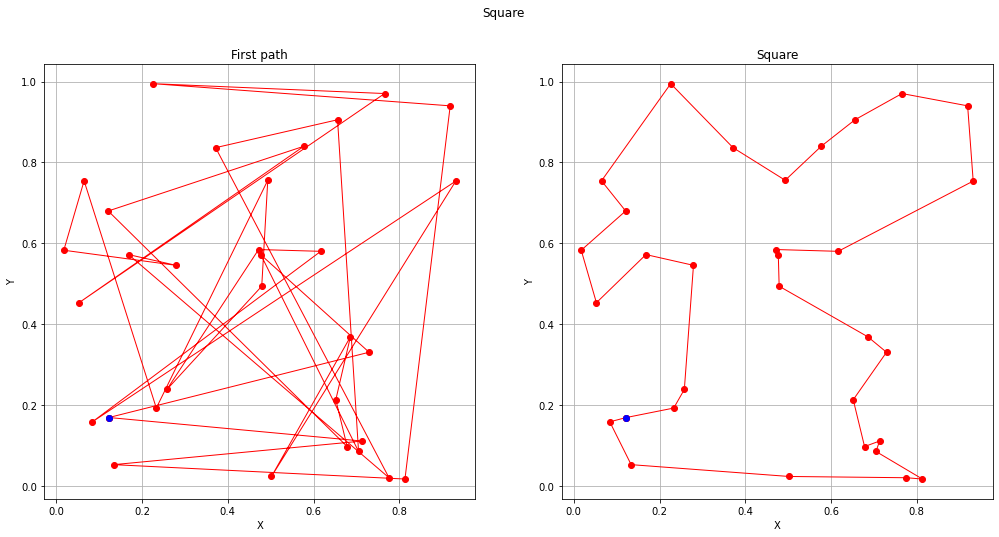

In [35]:
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt

fig = plt.figure (figsize = (17, 8))
plt.suptitle ("Square")

plt.subplot (1, 2, 1)
x, y = np.loadtxt ("Square_FirstPath_0.900000_0.050000.out", usecols=(2, 3), unpack=True)

plt.plot(x, y, '-o', color="Red", linewidth=1)
plt.plot(x[0], y[0], '-o', color="Blue", linewidth=1)
plt.title("First path")
plt.xlabel("X")
plt.ylabel("Y")
plt.grid(True)

plt.subplot (1, 2, 2)
x, y = np.loadtxt ("Square_BestPath_0.900000_0.050000.out", usecols=(2, 3), unpack=True)

plt.plot(x, y, '-o', color="Red", linewidth=1)
plt.plot(x[0], y[0], '-o', color="Blue", linewidth=1)
plt.title("Square")
plt.xlabel("X")
plt.ylabel("Y")
plt.grid(True)
              

plt.show()

Final length:  4.64898
Found after  692  generations


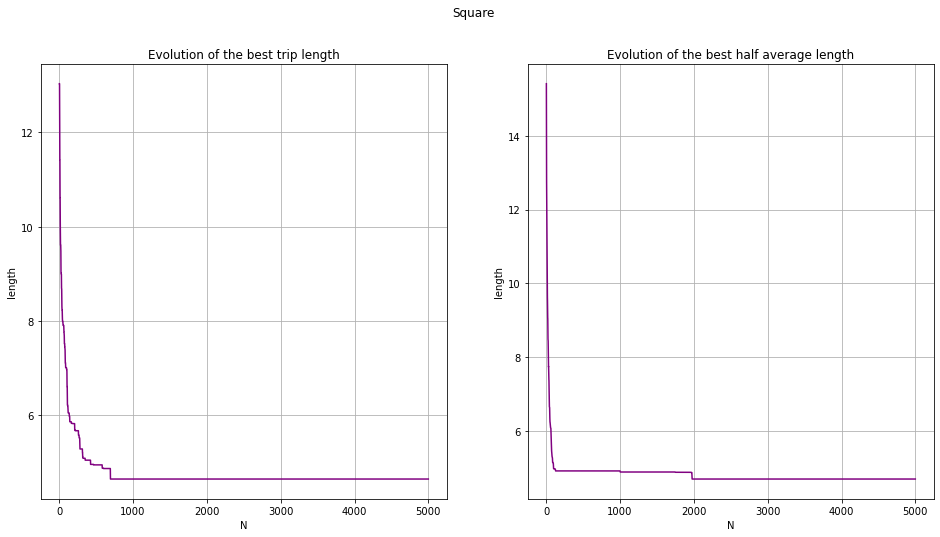

In [36]:
fig = plt.figure (figsize = (16, 8))
plt.suptitle ("Square")

plt.subplot (1, 2, 1)
n, l, g = np.loadtxt ("Square_Evolution_0.900000_0.050000.out", unpack=True)
last = len(l)
print ("Final length: ", l[last-1])
print ("Found after ", int(g[last-1]), " generations")

plt.plot(n, l, alpha=2, color="Purple") #marker='o',
plt.title("Evolution of the best trip length")
plt.xlabel("N")
plt.ylabel("length")
plt.grid(True)

plt.subplot (1, 2, 2)
n, l = np.loadtxt ("Square_Ave_0.900000_0.090000.out", usecols=(0, 1), unpack=True)

plt.plot(n, l, alpha=2, color="Purple") #marker='o',
plt.title("Evolution of the best half average length")
plt.xlabel("N")
plt.ylabel("length")
plt.grid(True)

plt.show()
